<a href="https://colab.research.google.com/github/yunkyung0725/--project/blob/main/googe_playstore_crolling(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://voyant-tools.org/?corpus=e6d4b0fd6fa2f3b6b1096c2fc6485d7b

In [32]:
!pip install google-auth google-auth-oauthlib google-api-python-client


In [33]:
# google_play_scraper 라이브러리 설치: 구글 플레이스토어에서 데이터를 쉽게 가져올 수 있게 해줍니다.
!pip install google_play_scraper

In [34]:
# google_play_scraper에서 필요한 기능과 정렬 방식을 가져옵니다.
from google_play_scraper import Sort, reviews_all
from datetime import datetime
import pandas as pd


# 'lang'은 리뷰를 가져올 언어를 설정합니다. 여기서는 'ko'로 설정하여 한국어 리뷰를 가져옵니다.
lang = 'ko'

# 'cont'는 리뷰를 가져올 국가를 설정합니다. 여기서는 'kr'로 설정하여 한국에서의 리뷰를 가져옵니다.
cont = 'kr'


# reviews_all 함수를 사용해 앱의 리뷰를 모두 가져옵니다. 이 예에서는 'com.hanbit.rundayfree'라는 앱의 리뷰를 가져옵니다.
result = reviews_all(
    'com.ibk.android.ionebank',
    sleep_milliseconds=3000, # 리뷰를 가져오는 사이의 대기 시간을 설정합니다. 0으로 설정하여 대기하지 않습니다.
    lang=lang, # 리뷰의 언어를 설정합니다. 여기서는 위에서 설정한 'ko'(한국어)입니다.
    country=cont, # 리뷰를 가져올 국가를 설정합니다. 여기서는 위에서 설정한 'kr'(한국)입니다.
    sort=Sort.MOST_RELEVANT, # 리뷰를 어떤 기준으로 정렬할지 설정합니다. 가장 관련성 높은 순으로 정렬합니다.
    #filter_score_with=5 #평점이 5점인 리뷰만 크롤링
)

# 수집하고자 하는 특정 기간 설정
start_date = datetime(2002,1,1)
end_date = datetime(2025,1,19)

# 수집된 리뷰 데이터를 저장할 리스트 초기화
reviews_data = []

# 수집된 리뷰에 대해 반복하며 필요한 정보를 리스트에 저장
for item in result:
    # 리뷰 날짜가 지정된 기간 안에 있는지 확인
    if start_date <= item['at'] <= end_date:
        # 리뷰 정보를 딕셔너리 형태로 저장
        review = {
            'date': item['at'],
            'userName': item['userName'],
            'score': item['score'],
            'content': item['content']
        }
        reviews_data.append(review)

# 리스트를 pandas DataFrame으로 변환
df_reviews = pd.DataFrame(reviews_data)
print(f"총 {len(df_reviews)}개의 리뷰가 수집되었습니다.")

# 리뷰 데이터를 CSV 파일로 저장
csv_filename = 'reviews_all.csv'  # 파일 이름에 기간을 포함시켰습니다.

df_reviews.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f'리뷰 데이터가 {csv_filename}에 저장되었습니다.')

총 14447개의 리뷰가 수집되었습니다.
리뷰 데이터가 reviews_all.csv에 저장되었습니다.


In [35]:
!pip install pandas
!pip install kiwipiepy
!pip install matplotlib
!pip install openpyxl  # Excel 파일을 읽기 위해 필요

In [36]:
import pandas as pd
from kiwipiepy import Kiwi
import matplotlib.pyplot as plt

print("라이브러리 설치 완료!")

라이브러리 설치 완료!


In [37]:
from google.colab import drive
drive_path = '/content/gdrive/MyDrive/data'

# 올바른 경로 확인
!ls '/content/reviews_all.csv'

/content/reviews_all.csv


In [38]:
import pandas as pd
from kiwipiepy import Kiwi
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive

# drive.mount('/content/gdrive/')
# drive_path = '/content/gdrive/MyDrive/data'

# 1. CSV 파일 불러오기 (특정 열만 선택)
file_path = '/content/reviews_all.csv'
columns_to_use = ['content']  # 사용할 열 지정
df = pd.read_csv(file_path, usecols=columns_to_use)



In [39]:
text=''
content=[]
for each_line in df['content']:
    content.append(each_line)

In [40]:
content[2]

'지문 정보가 바뀌었다면서 지문 로그인이 자꾸 해제됩니다. 전에도 한동안 가끔다가 매번 그랬어요. 몇번을 등록해도 다음번 로그인때 같은 증상이길래, 혹시나해서 캐시지웠더니 해결됐었는데, 오늘 또 그증상이 발생하네요. 캐시관리를 못하는 건지 오류인건지 도대체 왜이럴까요?'

In [41]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

content_=[]
for i in content:  #문자가 들어있을때는 인덱스 사용하면 안됨!!!!
    a=clean_str(i)
    content_.append(a)  #불용어제거한 review 저장

In [42]:
import re
text=''
content=[]
for each_line in df['content']:
    content.append(each_line)
#불용어 제거
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

content_=[]
for i in content:  #문자가 들어있을때는 인덱스 사용하면 안됨!!!!
    a=clean_str(i)
    content_.append(a)  #불용어제거한 review 저장

print(content_[2]) #원본 content 출력

지문 정보가 바뀌었다면서 지문 로그인이 자꾸 해제됩니다 전에도 한동안 가끔다가 매번 그랬어요 몇번을 등록해도 다음번 로그인때 같은 증상이길래 혹시나해서 캐시지웠더니 해결됐었는데 오늘 또 그증상이 발생하네요 캐시관리를 못하는 건지 오류인건지 도대체 왜이럴까요


In [43]:
!pip install konlpy

In [44]:
!pip install --upgrade JPype1

In [45]:
!apt-get update
!apt-get install -y openjdk-11-jdk


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [46]:
import nltk
from konlpy.tag import Okt; t=Okt()  #오픈 소스 한국어 분석기
#오픈 소스 한국어 분석기로 불용어를 제거한 후 추출을 진행함.
#리뷰하나씩 형태소 추출
a= len(content_) #불용어 제거한 리뷰
token_content_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문
    token_content=t.morphs(content_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    #token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_content_list.append(token_content) #하나의 리스트를 만들어서 df에 추가해야함.
df['token_content']=token_content_list #형태소단위로 나누어진 리뷰저장


In [47]:
df

,content,token_content
0,가입을 하려면 계좌번호를 입력하라고 하고 입력하면 이미 기업은행에 출금계좌로 등록되...,"[가입, 을, 하려면, 계좌, 번호, 를, 입력, 하, 라고, 하고, 입력, 하면,..."
1,해외에서 잠깐 접속 시도했다가 해외ip차단 설정해둬서 접속 안됐었음 현재 한국에서 ...,"[해외, 에서, 잠깐, 접속, 시도, 했다가, 해외, ip, 차단, 설정, 해, 둬..."
2,지문 정보가 바뀌었다면서 지문 로그인이 자꾸 해제됩니다. 전에도 한동안 가끔다가 매...,"[지문, 정보, 가, 바뀌었다면서, 지문, 로그인, 이, 자꾸, 해제, 됩니다, 전..."
3,"예전에 정말 좋았는데 최근 2주사이 완전 쓰레기임. 로그인도 안되고, 메인은 먹통이...","[예전, 에, 정말, 좋았는데, 최근, 2, 주, 사이, 완전, 쓰레기, 임, 로그..."
4,기존 앱에 비하여 불편합니다. 빠른 개선 요청드립니다. 불편사항 1. 현저히 느려진...,"[기존, 앱, 에, 비, 하여, 불편합니다, 빠른, 개선, 요청, 드립니다, 불편,..."
...,...,...
14442,잔액조회,"[잔액, 조회]"
14443,황지원앨사,"[황지원, 앨사]"
14444,편해용,[편해용]
14445,😁😁,[]


In [48]:

# The code provided creates a DataFrame called 'df'.  This code assumes 'df' is already created and in scope.
# If 'df' is not available, you must run the preceding code first to create 'df'.

# Save the DataFrame to a CSV file.
df.to_csv('output.csv', index=False, encoding='utf-8-sig')

print("df.csv")

df.csv


In [49]:

import pandas as pd

# Load the two CSV files
try:
  df_reviews = pd.read_csv('reviews_all.csv')
  df_output = pd.read_csv('output.csv')
except FileNotFoundError:
  print("Error: One or both of the CSV files were not found.")
  exit()


# Find common 'content' values
common_content = pd.merge(df_reviews, df_output, on='content', how='inner')

# Concatenate the DataFrames based on the common 'content'
# First, remove the duplicate column 'content' from df_output
# and then concat the dataframes

merged_df = pd.concat([df_reviews, df_output.drop(columns='content', errors='ignore')], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_reviews.csv', index=False, encoding='utf-8-sig')

print("Merged data saved to merged_reviews.csv")

Merged data saved to merged_reviews.csv


별점을 기준으로 정렬진행

In [50]:
merged_df_sorted_by_score=merged_df.sort_values(by='score',ascending=False)
print(merged_df_sorted_by_score)

                      date    userName  score  \
14446  2020-04-21 06:23:53  Google 사용자      5   
11122  2024-10-02 06:03:58  Google 사용자      5   
11110  2023-12-13 02:19:31  Google 사용자      5   
6117   2024-07-02 02:53:51  Google 사용자      5   
11112  2023-12-02 03:39:11  Google 사용자      5   
...                    ...         ...    ...   
5421   2020-10-10 03:25:12  Google 사용자      1   
5428   2019-06-09 23:10:45  Google 사용자      1   
5433   2020-06-28 09:12:06  Google 사용자      1   
5437   2022-12-13 11:10:45  Google 사용자      1   
7223   2020-10-13 04:30:06  Google 사용자      1   

                                                 content  \
14446                                                  👍   
11122                                                좋아요   
11110                                                좋아요   
6117                                         너무 쉽고 간단합니다   
11112                                              좋아요..   
...                                                

In [51]:
# prompt: token_content열에서 score가 1점인것끼리 묶고,  5점인 것끼리 묶어서 나눠줘. 그리고 각각 조사, 3번이하로 나온단어, 너무많이 나온 상위 5개의 단어는 제외하고 출력해줘

import pandas as pd

# Load the merged CSV file
try:
    merged_df = pd.read_csv('merged_reviews.csv')
except FileNotFoundError:
    print("Error: 'merged_reviews.csv' not found. Please run the previous code blocks first.")
    exit()

# Function to remove unwanted words
def remove_unwanted_words(tokens):
    stopwords = ["이","앱","가",
  "도",
  "에",
  "을","왜","진짜",'좋습니다','안','편리합니다','편해요','기업은행','은행','편해요','라고','하고','도','좋아요','사용','편리하고','편하고','이','인증','어플','이','을','앱','조사', '는', '가', '이', '을', '를', '에', '의', '로', '와', '과', '다', '입니다']  # Add more stopwords as needed

    # Remove words that appear less than or equal to 3 times
    word_counts = {}
    for token in tokens:
        word_counts[token] = word_counts.get(token, 0) + 1

    filtered_tokens = [token for token in tokens if word_counts.get(token, 0) > 3 and token not in stopwords]

    # Remove top 5 most frequent words
    word_counts_sorted = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
    top_5_words = [word for word, count in word_counts_sorted[:5]]

    filtered_tokens = [token for token in filtered_tokens if token not in top_5_words]

    return filtered_tokens

#Group by score and apply the filtering
# Group by score and apply the filtering
score_groups = merged_df.groupby('score')
result = {}

for score, group in score_groups:
    all_tokens = []
    for tokens_str in group['token_content']:
        try:
            tokens = eval(tokens_str)
            all_tokens.extend(tokens)
        except (SyntaxError, NameError, TypeError):
            print(f"Skipping invalid token_content: {tokens_str}")

    filtered_tokens = remove_unwanted_words(all_tokens)
    result[score] = filtered_tokens

# Print the results
for score, tokens in result.items():
    print(f"Score: {score}")
    print(tokens)
    print("-" * 20)

Score: 1
['가입', '하려면', '계좌', '번호', '입력', '하', '입력', '하면', '이미', '출금', '계좌', '등록', '중복', '등록', '안된다고', '하네요', '정작', '계좌', '번호', '누르면', '다른', '계좌', '바꿀수도', '없고', '장난', '합', '니까', '할', '금융', '중', '제일', '별로', '애초', '한', '적', '없으니까', '다운', '받아서', '가입', '하는', '건데', '계좌', '자동', '으로', '않고', '그렇다고', '타', '행', '계좌', '입력', '되는', '것', '아니고', '사용성', '개판', '부모님', '하시고', '항상', '달라', '고', '하셔서', '어쩔', '수', '없이', '이용', '중', '인데', '몇', '년', '동안', '같은', '짓', '반복', '하네요', '기업', '은', 'UX', '팀', '없나요', '제발', '반성', '합니다', '마음', '주', '거래', '바꾸라고', '권유', '싶은', '심정', '해외', '에서', '잠깐', '접속', '시도', '했다가', '해외', 'ip', '차단', '설정', '해', '접속', '현재', '한국', '에서', '다시', '시도', '하는데', '자꾸', '해외', 'ip', '접속', '정보', '조회', '버튼', '뜨고', '접속', '할수가', '없게', '다른', '금융', '들', '은', '전혀', '문제', '없이', '작동', '하는데', '것', '만', '이러네요', '알뜰폰', '이라', '예전', '정말', '좋았는데', '최근', '2', '주', '사이', '완전', '쓰레기', '임', '로그인', '안되고', '메인', '은', '먹통', '이고', '무슨', '짓거리', '하는지', '대충', '노트', '20', '알뜰폰', '사용자', '인데', '와이파이', '에서는', '실행', '잘', '됨', 'lte',

In [52]:
# prompt: filtered_tokens에서 score5점에서의 긍정리뷰 키워드의 빈도분석을 진행해줘

from collections import Counter

# Assuming 'result' dictionary is already populated from the previous code

# Analyze the frequency of positive review keywords for score 5
if 5 in result:
    positive_keywords_score_5 = result[5]
    keyword_counts = Counter(positive_keywords_score_5)

    # Print the frequency analysis
    print("Frequency analysis of positive review keywords for score 5:")
    for keyword, count in keyword_counts.most_common():
        print(f"{keyword}: {count}")
else:
    print("No reviews found with a score of 5.")

Frequency analysis of positive review keywords for score 5:
너무: 396
잘: 377
아주: 270
최고: 243
이체: 200
빠르고: 181
편리해요: 178
중: 173
간편하고: 165
요: 163
있습니다: 156
이용: 147
좋네요: 146
감사합니다: 145
은: 140
정말: 137
으로: 129
넘: 124
편함: 124
합니다: 117
보다: 117
굳: 117
좋음: 115
편하게: 112
편합니다: 109
좋은: 104
있어요: 101
쓰기: 98
계좌: 96
쉽고: 94
편리하게: 93
들: 92
수수료: 91
에서: 88
다른: 86
송금: 85
할: 84
적: 83
항상: 80
거래: 78
편리함: 76
조아요: 75
간편해서: 71
편리해서: 70
만: 69
타: 69
것: 68
없이: 68
쓰고: 67
매우: 66
뱅킹: 66
때: 66
참: 66
편하네요: 66
더: 65
짱: 65
한: 63
기업: 61
간편: 60
수: 59
편해서: 59
잘쓰고: 58
good: 57
좋아: 56
편리: 55
만족합니다: 55
보기: 53
가장: 53
내: 52
카드: 51
간편하게: 51
로그인: 50
편리하네요: 50
기능: 49
제일: 49
많이: 48
쉽게: 47
깔끔하고: 47
오류: 46
화면: 46
처리: 46
빠른: 45
같아요: 45
보안: 44
전: 43
좀: 43
통장: 42
해서: 42
하는: 41
업무: 41
직관: 41
만족: 41
인증서: 40
거: 40
좋: 40
좋아용: 40
주: 39
성: 39
있어: 39
계속: 39
나: 39
라서: 39
확인: 37
편리한: 37
빨: 36
있어서: 35
뱅크: 35
할수: 35
하기가: 35
잘쓰고있어요: 35
하: 34
인데: 34
자주: 34
없고: 34
바로: 33
게: 33
완전: 33
시간: 33
까지: 33
늘: 32
실행: 32
되어: 32
서비스: 32
후: 31
일: 31
업데이트: 31
지금: 31
메

In [53]:
# prompt: score1점에서의 부정리뷰 키워드의 빈도분석을 진행해줘

# Assuming 'result' dictionary is already populated from the previous code

# Analyze the frequency of negative review keywords for score 1
if 1 in result:
    negative_keywords_score_1 = result[1]
    keyword_counts = Counter(negative_keywords_score_1)

    # Print the frequency analysis
    print("Frequency analysis of negative review keywords for score 1:")
    for keyword, count in keyword_counts.most_common():
        print(f"{keyword}: {count}")
else:
    print("No reviews found with a score of 1.")

Frequency analysis of negative review keywords for score 1:
계좌: 1010
은: 943
신분증: 866
만: 821
못: 804
으로: 710
로그인: 614
하: 563
다시: 561
요: 544
계속: 524
에서: 518
오류: 496
다른: 489
너무: 482
인식: 476
인증서: 471
이체: 421
거: 419
들: 410
한: 400
확인: 392
설치: 376
할: 375
잘: 374
등록: 373
뭐: 371
버전: 351
번호: 347
건지: 343
내: 322
입력: 321
하는데: 320
해서: 319
화면: 309
본인: 308
좀: 305
하는: 303
실행: 301
때: 297
접속: 296
해도: 294
업데이트: 294
기존: 289
촬영: 282
고: 280
구: 271
것: 267
번: 266
안되고: 265
1: 263
부터: 263
아니: 262
개: 258
공인: 255
했는데: 254
더: 251
사람: 250
니까: 246
하면: 245
인데: 245
그냥: 244
라는: 243
해야: 242
통장: 237
후: 235
어떻게: 234
게: 232
카드: 227
가입: 222
전: 222
거래: 219
중: 218
처음: 218
패턴: 217
지: 216
나: 214
이런: 210
하나: 209
까지: 209
인: 208
무슨: 207
안됨: 206
면: 205
이렇게: 204
삭제: 203
폰: 199
네: 195
사진: 195
관리: 193
로딩: 191
이용: 190
문제: 185
하라: 183
안되네요: 182
타: 181
자꾸: 181
최악: 180
해주세요: 179
별: 179
쓰레기: 178
재: 177
네트워크: 175
시간: 172
연결: 169
수: 168
해: 168
새로: 166
비밀번호: 166
고객: 165
제: 164
안됩니다: 162
갑자기: 162
되는데: 160
아: 159
3: 156
뱅킹: 156
자체: 155
개설: 155
함: 

In [ ]:
# prompt: 위의 키워드를 워드 클라우드로 만들고 싶어

# Install wordcloud library
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'result' dictionary is already populated from the previous code (contains filtered tokens for each score)

# Function to create and display a word cloud
def create_wordcloud(tokens, title):
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)  # Use a suitable font path
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Create word clouds for score 1 and score 5 (adjust as needed)
if 1 in result:
    create_wordcloud(result[1], "Negative Reviews (Score 1)")

if 5 in result:
    create_wordcloud(result[5], "Positive Reviews (Score 5)")


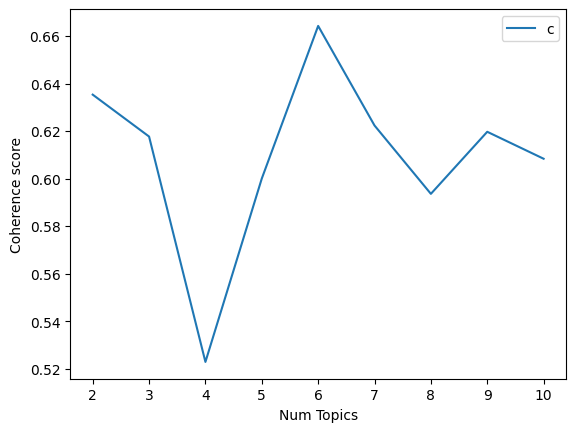

Optimal number of topics: 6


In [54]:
# prompt: 토픽모델링을 진행해서 토픽개수를 선정하기 위해서 일관성과 혼잡도 수치를 분석할 수 있도록 해주고 관련 그래프를 그려줘 가로축은 num topics로 세로축은 coherence score로 해서

import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models import CoherenceModel

# Load the merged data
try:
    merged_df = pd.read_csv('merged_reviews.csv')
except FileNotFoundError:
    print("Error: 'merged_reviews.csv' not found. Please run the previous code blocks first.")
    exit()

# Prepare the text data
documents = []
for tokens_str in merged_df['token_content']:
    try:
        tokens = eval(tokens_str)  # Safely evaluate the string representation of the token list
        documents.append(tokens)
    except (SyntaxError, NameError, TypeError):
        print(f"Skipping invalid token_content: {tokens_str}")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(documents)

# Create a corpus from a list of texts
corpus = [dictionary.doc2bow(text) for text in documents]

#각토픽수에 대해서 LDA모델을 생성 및 학습을 진행  토픽 개수 코퍼스를 학습하는 반복횟수
#LDA모델의 일관성을 측정후 단어의 의미적 유사성을 기준으로 coherence score를 계산을 진행함.
# Compute coherence values for different topic numbers
coherence_scores = []
for num_topics in range(2, 11): # Test topic numbers from 2 to 10
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())

# Plotting the coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics (example: the number with the highest coherence)
optimal_num_topics = range(2, 11)[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_num_topics}")

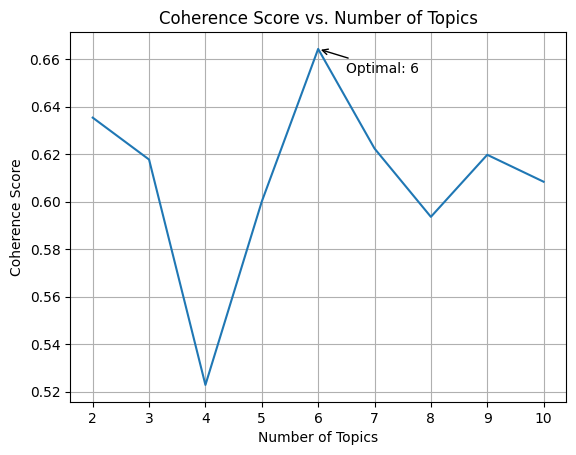

In [55]:
# prompt: 위를 참고해서 토픽 수와 혼란도의 상관관계를 시각화 해줘

import matplotlib.pyplot as plt

# Assuming 'coherence_scores' and 'range(2, 11)' are already defined from the previous code.
# If not, you need to run the LDA model training part first.

# Plotting the coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")  # Add a title
plt.grid(True)  # Add a grid for better readability
plt.xticks(range(2, 11)) # Ensure x-axis ticks show all topic numbers

# Annotate the plot with the optimal number of topics (optional)
optimal_num_topics = range(2, 11)[coherence_scores.index(max(coherence_scores))]
plt.annotate(f"Optimal: {optimal_num_topics}", xy=(optimal_num_topics, max(coherence_scores)), xytext=(optimal_num_topics + 0.5, max(coherence_scores) - 0.01),
             arrowprops=dict(arrowstyle="->"))

plt.show()


In [ ]:
# prompt: 4점,5점의 긍정리뷰의 토픽 모델링 및 키워드 추출을 진행할거야. topics수는 3으로 설정해서 해줘

# Assuming 'merged_df' and 'result' are already defined from the previous code.

import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from collections import Counter

# Filter reviews with scores 4 and 5
positive_reviews = merged_df[(merged_df['score'] == 4) | (merged_df['score'] == 5)]

# Prepare the text data for topic modeling
documents = []
for tokens_str in positive_reviews['token_content']:
    try:
        tokens = eval(tokens_str)
        documents.append(tokens)
    except (SyntaxError, NameError, TypeError):
        print(f"Skipping invalid token_content: {tokens_str}")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(documents)

# Create a corpus from a list of texts
corpus = [dictionary.doc2bow(text) for text in documents]

# Build LDA model with 3 topics
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=15)

# Print the topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Analyze keywords for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}")
    keywords = topic.split("+")
    for keyword in keywords:
        prob, word = keyword.strip().split("*")
        print(f"  {word}: {prob}")
    print("-" * 20)

In [ ]:
# prompt: 1점,2점의 부정리뷰의 토픽 모델링 및 키워드 추출을 진행할거야. topics수는 3으로 설정해서 해줘

# Assuming 'merged_df' is already loaded and processed.

# Filter reviews with scores 1 and 2
negative_reviews = merged_df[(merged_df['score'] == 1) | (merged_df['score'] == 2)]

# Prepare the text data for topic modeling
documents = []
for tokens_str in negative_reviews['token_content']:
    try:
        tokens = eval(tokens_str)
        documents.append(tokens)
    except (SyntaxError, NameError, TypeError):
        print(f"Skipping invalid token_content: {tokens_str}")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(documents)

# Create a corpus from a list of texts
corpus = [dictionary.doc2bow(text) for text in documents]

# Build LDA model with 3 topics
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=15)

# Print the topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Analyze keywords for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}")
    keywords = topic.split("+")
    for keyword in keywords:
        prob, word = keyword.strip().split("*")
        print(f"  {word}: {prob}")
    print("-" * 20)

빈도분석 결과를 추가한 단어 사전을 이용한 감성분석

별점 5점인 리뷰에 대해 빈도분석을 진행

In [ ]:
five_content=[]
five_token_content=[]
for i in range(0,3786):
    if(merged_df['score'][i]==5):
        five_content.append(merged_df['content'][i])  #5점리뷰모음. len=3191
        five_token_content.append(df['token_content'][i])


In [ ]:
#단어 빈도수 계산
# 단어 빈도수 계산
frequency = {}

for token_content in five_token_content:
    for word in token_content:
        count = frequency.get(word,0)
        frequency[word] = count + 1

In [ ]:
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print(sort)

In [ ]:
# prompt: 별점이 4점,5점인 리뷰에 대해 빈도분석을 진행해주고 워드클라우드로 시각화를 진행해줘 워드클라우드에서 한글로 출력이 잘 될 수 있도록 해줘

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'result' dictionary is populated from the previous code

# Combine tokens for scores 4 and 5
four_five_tokens = []
if 4 in result:
    four_five_tokens.extend(result[4])
if 5 in result:
    four_five_tokens.extend(result[5])

# Frequency analysis for scores 4 and 5 combined
if four_five_tokens:
    word_counts = Counter(four_five_tokens)
    print("Frequency analysis for scores 4 and 5:")
    for word, count in word_counts.most_common(30): # Show top 30
        print(f"{word}: {count}")

    # Wordcloud generation
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

else:
    print("No tokens found for scores 4 and 5")

In [ ]:
# prompt: 위의 긍정리뷰 키워드 빈도분석을 워드클라우드로 제시해줘

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'sorted_frequency' is already calculated from the previous code

# Create a dictionary for wordcloud input
wordcloud_dict = dict(sorted_frequency)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(wordcloud_dict)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# prompt: 별점이 3점인 리뷰에 대해서 빈도분석을 진행해줘.

import pandas as pd

# Load the merged reviews data
try:
    merged_reviews = pd.read_csv('merged_reviews.csv')
except FileNotFoundError:
    print("Error: merged_reviews.csv not found. Please make sure the file exists.")
    exit()

# Filter for reviews with a score of 3
three_star_reviews = merged_reviews[merged_reviews['score'] == 3]

# Prepare data for frequency analysis
three_star_tokens = []
for tokens in three_star_reviews['token_content']:
    if isinstance(tokens, str):  # Check if the value is a string
        try:
          token_list = eval(tokens) # Safely evaluate string to a list
          three_star_tokens.extend(token_list)
        except (NameError, SyntaxError):
          print(f"Skipping invalid token string: {tokens}")
    elif isinstance(tokens, list):
        three_star_tokens.extend(tokens)

# Calculate word frequencies
frequency = {}
for token in three_star_tokens:
    count = frequency.get(token, 0)
    frequency[token] = count + 1

# Sort by frequency
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

# Print or process the sorted frequency
sorted_frequency

In [ ]:
# prompt: 별점이 1점과 2점인 리뷰에 대해서 빈도분석을 진행해줘.

# Load the merged reviews data
try:
    merged_reviews = pd.read_csv('merged_reviews.csv')
except FileNotFoundError:
    print("Error: merged_reviews.csv not found. Please make sure the file exists.")
    exit()

# Filter for reviews with a score of 1 or 2
low_rated_reviews = merged_reviews[merged_reviews['score'].isin([1, 2])]

# Prepare data for frequency analysis
low_rated_tokens = []
for tokens in low_rated_reviews['token_content']:
    if isinstance(tokens, str):  # Check if the value is a string
        try:
            token_list = eval(tokens)  # Safely evaluate string to a list
            low_rated_tokens.extend(token_list)
        except (NameError, SyntaxError):
            print(f"Skipping invalid token string: {tokens}")
    elif isinstance(tokens, list):
        low_rated_tokens.extend(tokens)

# Calculate word frequencies
frequency = {}
for token in low_rated_tokens:
    count = frequency.get(token, 0)
    frequency[token] = count + 1

# Sort by frequency
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

# Print or process the sorted frequency
sorted_frequency

LDA진행후 감성분석 진행 네트워크 분석을 진행한후 시각화

https://brunch.co.kr/@bflysoft1117/199

http://dilab.kunsan.ac.kr/knusl.html 한국어 감성단어사전 및 감성사전에 포함되어있는 단어와 매칭 작업을 진행
한글 자연어 처리기 설치 및 형태소 분석기인 KONLPY와 MECAB설치를 진행함
https://m.blog.naver.com/j7youngh/222966330839

konlpy, Mecab을 이용한 토큰화

한글 토큰화 도구로 koNLPy에 제공하는 Mecab을 사용하면 가장 정확하게 형태소 분석을 할 수 있다. Mecab은 설치 과정이 다른 형태소 분류기보다 복잡하지만 형태소 분류 성능과 속도가 가장 뛰어난 것으로 알려져 있다.

​

특히 감성어 분석을 하기 위해서는 명사보다는 형태소를 토큰화하는 것이 타당하다. 토픽 분석과 같이 객관적인 단어가 필요할 때는 명사를, 감성분석과 같이 감성이 표현된 단어가 필요할 때는 형태소 분석이나 스페이스로 토큰화해 형용사나 동사의 형태를 살리는 것이 감성을 추출하는데 한층 유용하다. 위의 merged_df의 token_content열을 다음과 같이 수행

In [ ]:
# prompt: konlpy, Mecab을 이용한 토큰화
# 한글 토큰화 도구로 koNLPy에 제공하는 Mecab을 사용하면 가장 정확하게 형태소 분석을 할 수 있다. Mecab은 설치 과정이 다른 형태소 분류기보다 복잡하지만 형태소 분류 성능과 속도가 가장 뛰어난 것으로 알려져 있다.
# ​
# 특히 감성어 분석을 하기 위해서는 명사보다는 형태소를 토큰화하는 것이 타당하다. 토픽 분석과 같이 객관적인 단어가 필요할 때는 명사를, 감성분석과 같이 감성이 표현된 단어가 필요할 때는 형태소 분석이나 스페이스로 토큰화해 형용사나 동사의 형태를 살리는 것이 감성을 추출하는데 한층 유용하다. 위의 merged_df의 token_content열을 다음과 같이 수행하고 싶어

!apt-get update
!apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!python3 -m pip install --upgrade pip
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

from konlpy.tag import Mecab

mecab = Mecab()

# Assuming merged_df is already loaded and available
# Example usage with Mecab
merged_df['mecab_tokens'] = merged_df['token_content'].apply(lambda x: mecab.morphs(str(x)))

# Display the updated DataFrame (optional)
print(merged_df[['token_content', 'mecab_tokens']].head())

In [ ]:
# prompt: merged_df열에 위의 mecab_tokens열을 추가하는 코드를 작성

# Assuming merged_df is already loaded and available as in the previous code
# ipython-input-35-faa91fe7f93b 셀의 코드 수정

# 'mecab_tokens' 열이 존재하는지 확인하고, 없으면 생성합니다.
if 'mecab_tokens' not in merged_df.columns:
    from konlpy.tag import Mecab
    mecab = Mecab()
    merged_df['mecab_tokens'] = merged_df['token_content'].apply(lambda x: mecab.morphs(str(x)))

# Display the updated DataFrame (optional)
print(merged_df[['mecab_tokens', 'merged_df']].head())

# Save the updated DataFrame to a CSV file
merged_df.to_csv('merged_reviews_updated.csv', index=False, encoding='utf-8-sig')
print("Updated merged data saved to merged_reviews_updated.csv")

In [ ]:
print(merged_df)

In [ ]:
# prompt: 위의 내용에서 mecab_tokens열에서 특수문자와 불필요한 공백을 제거하고 전처리된 mecab_tokens_clean열을 새로운 열에 저장해줘

import pandas as pd
import re

# Load the updated DataFrame
try:
    merged_df = pd.read_csv('merged_reviews_updated.csv')
except FileNotFoundError:
    print("Error: 'merged_reviews_updated.csv' not found. Please run the previous code blocks first.")
    exit()

def clean_tokens(tokens):
    if isinstance(tokens, str):
        tokens = eval(tokens)  # Safely evaluate the string representation of the list

    cleaned_tokens = []
    for token in tokens:
        cleaned_token = re.sub(r'[^\w\s]', '', token).strip() # Remove special characters and extra whitespace
        if cleaned_token:  # Check if the token is not empty after cleaning
            cleaned_tokens.append(cleaned_token)
    return cleaned_tokens


# Apply the cleaning function to the 'mecab_tokens' column
merged_df['mecab_tokens_clean'] = merged_df['mecab_tokens'].apply(clean_tokens)

# Display the updated DataFrame (optional)
print(merged_df[['mecab_tokens', 'mecab_tokens_clean']].head())

# Save the updated DataFrame to a CSV file
merged_df.to_csv('merged_reviews_final.csv', index=False, encoding='utf-8-sig')
print("Final merged data saved to merged_reviews_final.csv")

In [ ]:

import pandas as pd
from collections import Counter
import re

# Load the DataFrame
try:
    df = pd.read_csv('merged_reviews_updated.csv')
except FileNotFoundError:
    print("Error: 'merged_reviews_updated.csv' not found. Please run the previous code blocks first.")
    exit()

# Function to preprocess tokens (combining previous steps)
def preprocess_tokens(tokens):
    if isinstance(tokens, str):
        try:
            tokens = eval(tokens)  # Safely evaluate the string representation of the list
        except (NameError, SyntaxError):
            print(f"Skipping invalid token string: {tokens}")
            return []

    token_content_list = []
    for token_list in tokens:
        if isinstance(token_list, str):
            token_content_list.extend(eval(token_list))
        elif isinstance(token_list, list):
            token_content_list.extend(token_list)

    word_counts = Counter(token_content_list)

    # Find top 5 frequent words
    top_5_words = [word for word, count in word_counts.most_common(5)]

    # Define stopwords (including words with frequency <= 3 and Korean particles/endings)
    stopwords = [word for word, count in word_counts.items() if count <= 3]
    stopwords.extend(top_5_words)

    # Example of Korean particles/endings (add more if needed)
    korean_stopwords = ["있는데", "이고", "돼서", "이나", "되고", "입니다", "라고", "이라", "면", "은", "는", "이", "가", "을", "를", "에", "의", "로", "와", "과", "에서", "부터", "까지", "들", "과", "다", "도", "만", "아", "어", "았", "였", "것"]
    stopwords.extend(korean_stopwords)


    cleaned_tokens = []
    for token in tokens:
      cleaned_token = re.sub(r'[^\w\s]', '', token).strip()
      if cleaned_token and cleaned_token not in stopwords:  # Check for empty strings and stopwords
          cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

# Apply the preprocessing to the 'mecab_tokens' column
df['preprocessed_mecab_tokens'] = df['mecab_tokens'].apply(preprocess_tokens)

# Display the updated DataFrame
print(df[['mecab_tokens', 'preprocessed_mecab_tokens']].head())

# Save the updated DataFrame
df.to_csv('merged_reviews_final.csv', index=False, encoding='utf-8-sig')
print("Final merged data saved to merged_reviews_final.csv")

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the final DataFrame
try:
    merged_df = pd.read_csv('merged_reviews_final.csv')
except FileNotFoundError:
    print("Error: 'merged_reviews_final.csv' not found. Please run the previous code blocks first.")
    exit()

# Assuming 'mecab_tokens_clean' contains lists of tokens
# Convert lists of tokens to strings for TF-IDF
merged_df['mecab_tokens_clean_str'] = merged_df['mecab_tokens_clean'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x) )


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(merged_df['mecab_tokens_clean_str'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Concatenate the TF-IDF DataFrame with the original DataFrame
final_df = pd.concat([merged_df, tfidf_df], axis=1)

# Display the first few rows of the final DataFrame (optional)
print(final_df.head())

# Save the final DataFrame to a CSV file
final_df.to_csv('merged_reviews_tfidf.csv', index=False, encoding='utf-8-sig')
print("Final merged data with TF-IDF saved to merged_reviews_tfidf.csv")

메캅을 사용하게 되면 한 문장을 가져와 형태소로 토큰화 한 단어가 리스트로 저장이 되기 때문에 결과가 2차원 리스트(예: [["나는", "정말"], ["영화가", "정말", "재밌다"], ....]로 저장이 된다. 그래서 다음 작업인 사전과 단어를 매칭 시키기 위해서는 2차원 리스트를 1차원 리스트로 변환해 줘야 한다.

In [ ]:


from konlpy.tag import Mecab
mecab = Mecab()

# Tokenize each review using Mecab
tokens = [mecab.morphs(word) for word in content_]  # Use content_ instead of reviews

# Join the tokens back into strings, separated by spaces
tokens = list(map(lambda x: " ".join(x), tokens))

# Print the first 10 tokenized reviews
print(tokens[:10])

In [ ]:
# 2. 텍스트 정제 함수
def clean_text(text):
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 다중 공백 제거
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# 3. 정규화 및 명사 추출 함수
def process_text(text, kiwi, stopwords):
    # 텍스트 정제
    clean = clean_text(text)
    # 형태소 분석 및 명사 추출
    tokens = kiwi.tokenize(clean)
    noun_tags = ['NNG', 'NNP', 'NNB', 'NP', 'NR']
    nouns = [token.form for token in tokens if token.tag in noun_tags]
    # 불용어 제거
    filtered = [noun for noun in nouns if noun not in stopwords]
    return filtered

# 4. Kiwi 초기화 및 불용어 설정
kiwi = Kiwi()
stopwords = ['것', '수', '이다', '그', '이', '저','거','으로','듯','과','고','는','네']  # 불용어 리스트
#'하다', '있다', '없다', '되다'
# 5. 각 열에 대해 텍스트 정제 및 명사 추출 수행
for column in columns_to_use:
    df[f'{column}_processed'] = df[column].dropna().apply(lambda x: process_text(str(x), kiwi, stopwords))

# 6. 결과 저장
output_path = './processed_emphs_core_matter.csv'  # 로컬 경로로 저장
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print("텍스트 정제 및 처리 완료. 결과 파일 저장:", output_path)

In [ ]:
# 필요한 라이브러리 임포트
from google_play_scraper import Sort, reviews_all
from datetime import datetime
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from kiwipiepy import Kiwi

In [ ]:
!pip install WordCloud

In [ ]:
!ls /usr/share/fonts/truetype/nanum/
!apt-get update -qq
!apt-get install -qq fonts-nanum


In [ ]:
# prompt: 위의 내용에 이어서 리뷰데이터의 주요 키워드를 분석해줘

import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv('./processed_emphs_core_matter.csv')

# 명사 추출 결과 열을 하나의 리스트로 합치기
all_nouns = []
for nouns in df['content_processed']:
    try:
        all_nouns.extend(eval(nouns))  # 문자열을 리스트로 변환
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {nouns}")
        continue

# 단어 빈도 계산
word_counts = Counter(all_nouns)

# 상위 n개의 단어 추출 (n=20으로 설정)
top_n = 20
most_common_words = word_counts.most_common(top_n)

# 결과 출력
print(f"상위 {top_n}개의 키워드:")
for word, count in most_common_words:
    print(f"- {word}: {count}")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔 폰트 사용
).generate_from_frequencies(dict(word_counts))

# WordCloud 이미지 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Customer Reviews")
plt.show()


In [ ]:
import pandas as pd

# 파일 경로 설정
reviews_file_path = 'reviews_all.csv'  # 리뷰 파일 경로
processed_file_path = 'processed_emphs_core_matter.csv'  # 처리된 파일 경로
output_file_path = 'reviews_with_processed_content.csv'  # 결과 파일 경로

# CSV 파일 로드
reviews_df = pd.read_csv(reviews_file_path)
processed_df = pd.read_csv(processed_file_path)

# 'content_processed' 열 추가
if 'content_processed' in processed_df.columns:
    reviews_df['content_processed'] = processed_df['content_processed']

# 결과 저장
reviews_df.to_csv(output_file_path, index=False)

print(f"Updated file saved to: {output_file_path}")


In [ ]:
import pandas as pd

# 1. 파일 경로 설정
file_path = 'reviews_with_processed_content.csv'  # 입력 파일 경로
output_file_path = 'reviews_with_labels.csv'  # 결과 파일 경로

# 2. CSV 파일 읽기
df = pd.read_csv(file_path)

# 3. 'score' 열을 기준으로 라벨링 수행
# score 값이 1, 2, 3인 경우 -> 0, 그 외 -> 1
if 'score' in df.columns:
    df['score_label'] = df['score'].apply(lambda x: 0 if x in [1, 2, 3] else 1)

# 4. 결과를 새 CSV 파일로 저장
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"라벨링 완료. 결과 파일 저장: {output_file_path}")


In [ ]:
# prompt: reviews_with_labels.csv파일에서 score_label이 0인 데이터와 score_label이 1인데이터를 두개의 csv파일로 나누어서 각각의 파일을 감정분석을 진행할거야

import pandas as pd

# Load the dataframe.
df = pd.read_csv('reviews_with_labels.csv')

# Filter data based on 'score_label'.
df_label_0 = df[df['score_label'] == 0]
df_label_1 = df[df['score_label'] == 1]

# Save to csv files.
df_label_0.to_csv('reviews_label_0.csv', index=False)
df_label_1.to_csv('reviews_label_1.csv', index=False)

In [ ]:
# prompt: reviews_with_labels.csv 파일의 content_processed열의 단어토큰화결과로 단어별로 빈도수가 어느정도인지 출력해주고 모든 단어들의 빈도수를 알고싶어

import pandas as pd
from collections import Counter

# CSV 파일 불러오기
df = pd.read_csv('reviews_with_labels.csv')

# 모든 단어의 빈도수를 저장할 딕셔너리
all_word_counts = Counter()

# 각 행의 'content_processed' 열 값을 순회하며 단어 빈도수 계산
for index, row in df.iterrows():
    try:
        # 문자열을 리스트로 변환 (eval 사용)
        words = eval(row['content_processed'])
        all_word_counts.update(words)
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")  # 에러 발생 시 출력
        continue  # 다음 행으로 넘어감

# 모든 단어의 빈도수 출력
print("모든 단어의 빈도수:")
for word, count in all_word_counts.items():
    print(f"{word}: {count}")

In [ ]:
# prompt: 위에서 빈도수가 낮은 단어는 배제하고 싶어 단어집합의 크기를 알려줘 그리고 .3번미만으로 나온 단어들을 카운트 해줘 등장빈도가 2번이하인 희귀단어의 수를 세어주고 희귀단어의 비율은 어느정도인지 그리고 전체 등장 빈도에서 희귀단어의 등장 빈도비율을 어떻게 되는지 알려줘

from collections import Counter

# CSV 파일 불러오기 (이전 코드에서 생성된 파일 사용)
df = pd.read_csv('reviews_with_labels.csv')

# 모든 단어의 빈도수를 저장할 Counter 객체 생성
all_word_counts = Counter()

# 각 행의 'content_processed' 열 값을 순회하며 단어 빈도수 계산
for index, row in df.iterrows():
    try:
        # 문자열을 리스트로 변환 (eval 사용)
        words = eval(row['content_processed'])
        all_word_counts.update(words)
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")
        continue

# 단어 집합의 크기 출력
vocab_size = len(all_word_counts)
print(f"단어 집합의 크기 (어휘 개수): {vocab_size}")

# 등장 빈도가 3번 미만인 단어 개수 계산
rare_words = [word for word, count in all_word_counts.items() if count < 3]
num_rare_words = len(rare_words)
print(f"등장 빈도가 3번 미만인 단어의 개수: {num_rare_words}")


# 등장 빈도가 2번 이하인 단어의 개수 계산
rare_words_2 = [word for word, count in all_word_counts.items() if count <= 2]
num_rare_words_2 = len(rare_words_2)

# 희귀 단어 비율 계산
rare_word_ratio = (num_rare_words_2 / vocab_size) * 100

# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율 계산
total_freq = sum(all_word_counts.values())
rare_freq = sum([count for word, count in all_word_counts.items() if count <= 2])
rare_freq_ratio = (rare_freq / total_freq) * 100

print(f"등장 빈도가 2번 이하인 희귀 단어의 수: {num_rare_words_2}")
print(f"희귀 단어 비율: {rare_word_ratio:.2f}%")
print(f"전체 등장 빈도에서 희귀 단어 등장 빈도 비율: {rare_freq_ratio:.2f}%")

In [ ]:
# prompt: 여기서 빈도수가 낮은 단어는 제거를 하고 싶어 전체단어개수중 빈도수가 2이하인 단어는 제거를 해줘

# CSV 파일 불러오기 (이전 코드에서 생성된 파일 사용)
df = pd.read_csv('reviews_with_labels.csv')

# 모든 단어의 빈도수를 저장할 Counter 객체 생성
all_word_counts = Counter()

# 각 행의 'content_processed' 열 값을 순회하며 단어 빈도수 계산
for index, row in df.iterrows():
    try:
        # 문자열을 리스트로 변환 (eval 사용)
        words = eval(row['content_processed'])
        all_word_counts.update(words)
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")
        continue

# 빈도수가 2 이하인 단어 제거
filtered_words = {word: count for word, count in all_word_counts.items() if count > 2}

print("빈도수가 2 초과인 단어:")
for word, count in filtered_words.items():
    print(f"{word}: {count}")

# 빈도수가 2 이하인 단어를 제거한 후의 단어 집합 크기 계산
vocab_size_filtered = len(filtered_words)
print(f"\n빈도수가 2 초과인 단어 집합의 크기: {vocab_size_filtered}")

In [ ]:
# prompt: 빈도수가 2초과인 단어집합과 단어들만다 포함을 해서 reviews_with_labels해당 파일을 다시 만들어서 새로운 csv파일로 제시해줘

import pandas as pd
from collections import Counter

# CSV 파일 불러오기
df = pd.read_csv('reviews_with_labels.csv')

# 모든 단어의 빈도수를 저장할 Counter 객체 생성
all_word_counts = Counter()

# 각 행의 'content_processed' 열 값을 순회하며 단어 빈도수 계산
for index, row in df.iterrows():
    try:
        # 문자열을 리스트로 변환 (eval 사용)
        words = eval(row['content_processed'])
        all_word_counts.update(words)
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")
        continue

# 빈도수가 2 초과인 단어만 필터링
filtered_words = {word: count for word, count in all_word_counts.items() if count > 2}

# 새로운 데이터프레임 생성
new_df = pd.DataFrame(columns=df.columns)

# 빈도수가 2 초과인 단어만 포함된 리뷰만 새로운 데이터프레임에 추가
for index, row in df.iterrows():
    try:
      words = eval(row['content_processed'])
      filtered_review_words = [word for word in words if word in filtered_words]
      if filtered_review_words:  # 필터링된 단어가 있는 경우에만 추가
          row['content_processed'] = str(filtered_review_words) # 다시 문자열로 변환
          new_df = pd.concat([new_df, pd.DataFrame([row])], ignore_index=True)

    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")
        continue

# 새로운 CSV 파일로 저장
new_df.to_csv('new_reviews_with_labels.csv', index=False, encoding='utf-8-sig')

print("새로운 파일 'new_reviews_with_labels.csv' 생성 완료")

여기서 부터

In [ ]:
# prompt: new_reviews_with_labels.csv해당 파일의 content_processed열의 단어에 정수를 빈도수 순서대로 매핑해서 제시해주고 단어인코딩을 진행해줘

import pandas as pd
from collections import Counter

# CSV 파일 불러오기
df = pd.read_csv('new_reviews_with_labels.csv')

# 모든 단어의 빈도수를 계산합니다.
all_word_counts = Counter()
for index, row in df.iterrows():
    try:
        words = eval(row['content_processed'])
        all_word_counts.update(words)
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {row['content_processed']}")
        continue

# 단어에 정수를 빈도수 순으로 매핑합니다.
word_to_index = {word: idx + 1 for idx, (word, _) in enumerate(all_word_counts.most_common())}

# 단어 인코딩 함수
def encode_words(text):
    try:
      words = eval(text)
      encoded = [word_to_index.get(word, 0) for word in words]  # 단어가 없으면 0으로 처리
      return encoded
    except (SyntaxError, TypeError):
        print(f"Error evaluating: {text}")
        return []

# 'content_processed' 열을 인코딩합니다.
df['encoded_content'] = df['content_processed'].apply(encode_words)

# 결과를 새로운 CSV 파일로 저장합니다.
df.to_csv('new_reviews_with_labels_encoded.csv', index=False, encoding='utf-8-sig')

print("'new_reviews_with_labels_encoded.csv' 파일이 생성되었습니다.")

# word_to_index 출력 (선택 사항)
print("\n단어 인덱스 매핑:")
for word, index in word_to_index.items():
    print(f"{word}: {index}")

In [ ]:
# prompt: 정수로 인코딩된 데이터를 train과 test로 8대2의 비율로 나누어서 저장해줘

import pandas as pd
from sklearn.model_selection import train_test_split

# CSV 파일 불러오기
df = pd.read_csv('new_reviews_with_labels_encoded.csv')

# 데이터 분할 (8:2 비율)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 각 데이터프레임을 새로운 CSV 파일로 저장
train_df.to_csv('train_encoded.csv', index=False, encoding='utf-8-sig')
test_df.to_csv('test_encoded.csv', index=False, encoding='utf-8-sig')

print("데이터가 train_encoded.csv와 test_encoded.csv 파일로 저장되었습니다.")

In [ ]:
# prompt: new_reviews_with_labels.csv여기서 리뷰의 최대길이와 평균길이를 알고싶고 이를 시각화해줘

import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv('new_reviews_with_labels.csv')

# 리뷰 길이 계산
df['review_length'] = df['content'].astype(str).apply(len)

# 최대 리뷰 길이
max_length = df['review_length'].max()
print(f"최대 리뷰 길이: {max_length}")

# 평균 리뷰 길이
avg_length = df['review_length'].mean()
print(f"평균 리뷰 길이: {avg_length}")

# 리뷰 길이 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# 리뷰 길이 박스플롯
plt.figure(figsize=(8, 6))
plt.boxplot(df['review_length'], vert=False)
plt.title('Review Length Boxplot')
plt.xlabel('Review Length')
plt.show()

In [ ]:
# prompt: 100보다 길이가 짧다면 0을 채워서 100으로 만들어서 인코딩을 진행하고 , 100보다 길다면 뒷부분은 잘라서 100으로 만들어서 인코딩을 진행해줘

import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('new_reviews_with_labels_encoded.csv')

def pad_or_truncate(encoded_list):
  # encoded_list가 문자열인 경우 리스트로 변환
  if isinstance(encoded_list, str):
    encoded_list = eval(encoded_list)

  if len(encoded_list) < 100:
    return encoded_list + [0] * (100 - len(encoded_list))
  else:
    return encoded_list[:100]

# 'encoded_content' 열에 대해 패딩 또는 자르기 적용
df['encoded_content'] = df['encoded_content'].apply(pad_or_truncate)

# 결과를 새로운 CSV 파일로 저장합니다.
df.to_csv('final_reviews_encoded.csv', index=False, encoding='utf-8-sig')

print("'final_reviews_encoded.csv' 파일이 생성되었습니다.")

In [ ]:
# prompt: reviews_with_labels.csv 파일의 데이터를 test와 train set의 데이터로 80대 20의 비율로 나누어줘

import pandas as pd
from sklearn.model_selection import train_test_split

# 파일 경로 설정
file_path = 'final_reviews_encoded.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 분할 (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 결과 출력 또는 저장 (선택 사항)
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# 분할된 데이터를 새로운 CSV 파일로 저장 (선택 사항)
train_df.to_csv('train_data.csv', index=False, encoding='utf-8-sig')
test_df.to_csv('test_data.csv', index=False, encoding='utf-8-sig')